## Imports

In [24]:
import pandas as pd
import numpy as np
import re
import nltk
import string

In [6]:
! python preprocessing_functions.py

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


## Text reading & extracting information

In [8]:
dfRaw = pd.read_csv('Dataset\Instagram_profile_20220206_113245.csv')
dfRaw.iloc[0]

C:\Users\jyoti\anaconda3\envs\yourenvname\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,10,20,26,27,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                                           NaN
username                                     NaN
fbid                                         NaN
connected_fb_page                            NaN
profile_pic_url                              NaN
full_name                                    NaN
biography                                    NaN
external_url                                 NaN
is_verified                                  NaN
is_private                                   NaN
category_name                                NaN
category_enum                                NaN
is_joined_recently                           NaN
highlight_reel_count                         NaN
has_ar_effects                               NaN
has_clips                                    NaN
has_guides                                   NaN
has_channel                                  NaN
is_business_account                          NaN
business_address_json                        NaN
business_contact_met

## Exploration

In [10]:
columns_to_drop = ['username',
 'fbid',
 'connected_fb_page',
 'profile_pic_url',
 'full_name',
 'is_verified',
 'is_private',
 'category_name',
 'category_enum',
 'is_joined_recently',
 'highlight_reel_count',
 'has_ar_effects',
 'has_clips',
 'has_guides',
 'has_channel',
 'is_business_account',
 'business_address_json',
 'business_contact_method',
 'business_email',
 'business_phone_number',
 'status',
 'description',
 'user_id',
 'input_posts_number',
 'input_post_type',
 'input_stop_id',
 'input_date_of_post',
 'warning',
 'error']

1. likes/followers - ER
2. Considering only those accounts who have more than 100 posts. 
3. Considering the number of likes in the past k days.
4. two ways for feature processing - 
    a. Considering only last k post per user
    b. Considering all the posts of the past and deriving (L-k) features in repetivive manner.
5. 

In [11]:
def check_nanColumns(dfRaw):
    nan_col = []
    cols = list(dfRaw.columns)
    for col in cols:
        if dfRaw[col].isnull().values.any() == True:
            nan_col.append(col)
    return nan_col

len(columns_to_drop)

29

In [12]:
dfRaw.drop(columns_to_drop, axis = 1, inplace=True)

In [13]:
cols = list(dfRaw.columns)
nan_cols = (check_nanColumns(dfRaw))
print('Total columns: ', cols, ' with length: ', len(cols), '\n','Columns containing nan values: ',nan_cols,' and length: ', len(nan_cols)) #if the columns where nan is accepted, can be dealt here.
print('Shape of dataframe: ', dfRaw.shape)

Total columns:  ['id', 'biography', 'external_url', 'followers', 'posts_count', 'following', 'account', 'caption', 'profile_name', 'profile_image_link', 'likes', 'datetime', 'image_url', 'url', 'comments', 'thumbnails', 'input_account']  with length:  17 
 Columns containing nan values:  ['id', 'biography', 'external_url', 'followers', 'posts_count', 'following', 'account', 'caption', 'profile_name', 'profile_image_link', 'likes', 'datetime', 'image_url', 'url', 'comments', 'thumbnails', 'input_account']  and length:  17
Shape of dataframe:  (62921, 17)


In [14]:
#Removing the nan rows from all the columns:
dfRaw = dfRaw.dropna()
print("New shape after removing nan: ", dfRaw.shape)


New shape after removing nan:  (58929, 17)


In [15]:
cols = list(dfRaw.columns)
nan_cols = (check_nanColumns(dfRaw))
print('Total columns: ', cols, ' with length: ', len(cols), '\n','Columns containing nan values: ',nan_cols,' and length: ', len(nan_cols)) #if the columns where nan is accepted, can be dealt here.
print('Shape of dataframe: ', dfRaw.shape)

Total columns:  ['id', 'biography', 'external_url', 'followers', 'posts_count', 'following', 'account', 'caption', 'profile_name', 'profile_image_link', 'likes', 'datetime', 'image_url', 'url', 'comments', 'thumbnails', 'input_account']  with length:  17 
 Columns containing nan values:  []  and length:  0
Shape of dataframe:  (58929, 17)


## Observations:
    1. Thumbnails contains the images as post. Redundant in case of images. 
    3. POST attribute => image_url, url, thumbnails 
    2. USER attribute => id, account, profile_name, input_account


In [16]:
dfRaw[['id', 'account', 'profile_name', 'input_account']][:5]

,id,account,profile_name,input_account
29,2.77E+18,maurino_joffily,Dr. Maurino Joffily,maurino_joffily
30,2.76E+18,maurino_joffily,Dr. Maurino Joffily,maurino_joffily
31,2.76E+18,maurino_joffily,Dr. Maurino Joffily,maurino_joffily
32,2.76E+18,maurino_joffily,Dr. Maurino Joffily,maurino_joffily
33,2.75E+18,maurino_joffily,Dr. Maurino Joffily,maurino_joffily


In [17]:
dfRaw[['image_url', 'url', 'thumbnails']][:5]

,image_url,url,thumbnails
29,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZki1wfvXYq/,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n..."
30,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZUrYFrOO5v/,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n..."
31,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CZAgVoyPi0i/,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n..."
32,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CY9pMGVP_BY/,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n..."
33,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/p/CYrbwXQrY3v/,"[{""src"":""https://instagram.fuvf1-1.fna.fbcdn.n..."


* Hence we keep only *account* & *image_url* for further preprocessing. 
* We divide the df in two parts:
    1. **dfUser**: contains details about user. Since this is repetitive data wrt insta posts.
    2. **dfPost**: contains details about the post by the user.  

In [18]:
colsUser = ['account', 'followers','posts_count', 'following', 'biography','external_url', 'profile_image_link']
colsPost = ['account','caption', 'likes', 'datetime', 'image_url']
print(len(dfRaw.columns), len(colsUser)+len(colsPost))

17 12


In [19]:
dfUser = dfRaw[colsUser]
dfPost = dfRaw[colsPost]
dfUser.head()

,account,followers,posts_count,following,biography,external_url,profile_image_link
29,maurino_joffily,23300.0,276.0,7003.0,Have your BBL with an authentic expertðŸ‡§ðŸ‡·...,http://www.drjoffily.co.uk/,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....
30,maurino_joffily,23300.0,276.0,7003.0,Have your BBL with an authentic expertðŸ‡§ðŸ‡·...,http://www.drjoffily.co.uk/,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....
31,maurino_joffily,23300.0,276.0,7003.0,Have your BBL with an authentic expertðŸ‡§ðŸ‡·...,http://www.drjoffily.co.uk/,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....
32,maurino_joffily,23300.0,276.0,7003.0,Have your BBL with an authentic expertðŸ‡§ðŸ‡·...,http://www.drjoffily.co.uk/,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....
33,maurino_joffily,23300.0,276.0,7003.0,Have your BBL with an authentic expertðŸ‡§ðŸ‡·...,http://www.drjoffily.co.uk/,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....


In [20]:
dfPost.head()

,account,caption,likes,datetime,image_url
29,maurino_joffily,Quick recovery and result after 10 days only #...,173.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....
30,maurino_joffily,This patient is very happy with this change on...,388.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....
31,maurino_joffily,360 Vaser lipo and fat transfer to correct a h...,160.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....
32,maurino_joffily,Breast uplift without implants is a good combi...,211.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....
33,maurino_joffily,Great transformation after these combined proc...,210.0,1.640000e+12,https://instagram.fuvf1-1.fna.fbcdn.net/v/t51....


### Removing duplicates from the dfUser & dfPost
* 'account' works as key for both the dataframes dfUser and dfPost

In [21]:
print('Shapes before dropping the duplicates in dfPost and dfUser: ', dfPost.shape, dfUser.shape)
dfPost.drop_duplicates(inplace=True)
dfUser.drop_duplicates(inplace=True)
print('Shapes after dropping the duplicates in dfPost and dfUser: ', dfPost.shape, dfUser.shape) 

Shapes before dropping the duplicates in dfPost and dfUser:  (58929, 5) (58929, 7)
Shapes after dropping the duplicates in dfPost and dfUser:  (58929, 5) (367, 7)


C:\Users\jyoti\anaconda3\envs\yourenvname\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## Insights in UserData

In [62]:
dfUser.head()

,account,followers,posts_count,following,biography,external_url,profile_image_link
29,maurino_joffily,23300.0,276.0,7003.0,Have your BBL with an authentic expert🇧🇷\nSpec...,http://www.drjoffily.co.uk/,https://instagram.fwzy1-2.fna.fbcdn.net/v/t51....
124,CosmeticSurgeonsLondon,77790.0,1041.0,2954.0,📍London & Herts\n🩺 Plastic Surgeon 20yr experi...,http://www.cosmeticsurgeonslondon.co.uk/,https://scontent-lga3-2.cdninstagram.com/v/t51...
173,neilbulstrode,576.0,10.0,24.0,Consultant Plastic Reconstructive and Cosmetic...,http://www.neilbulstrode.com/,https://scontent-bos3-1.cdninstagram.com/v/t51...
177,capitolcitydental,37.0,4.0,34.0,I can’t feel my face when I’m with you 💉 😷,http://capitolcitydental.com/,https://instagram.fmia1-2.fna.fbcdn.net/v/t51....
180,bodysilk,291.0,156.0,708.0,#Startyourownsalon with Body Silk #franchise. ...,http://www.bodysilk.co.uk/,https://scontent-atl3-1.cdninstagram.com/v/t51...


In [72]:
quantUser_hi = dfUser['followers'].quantile(.80)
quantUser_lo = dfUser['followers'].quantile (.10)
dfUserFiltered = dfUser[(dfUser["followers"] < quantUser_hi) & (dfUser["followers"] > quantUser_lo)]

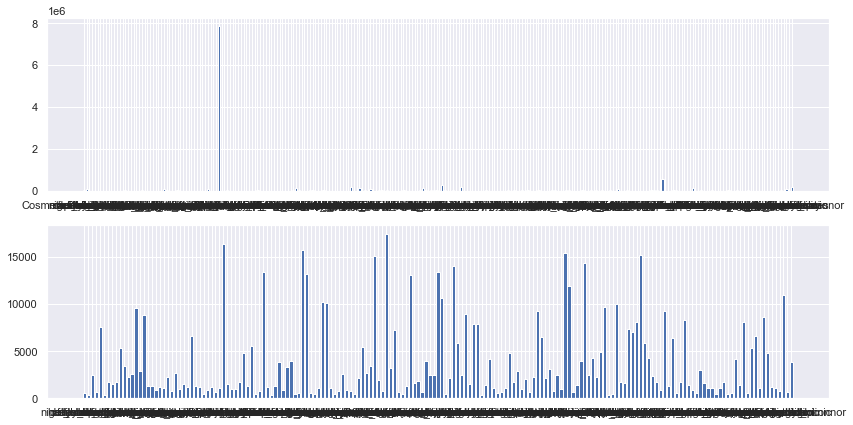

In [80]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.bar(dfUser['account'], dfUser['followers'])
ax2.bar(dfUserFiltered['account'], dfUserFiltered['followers'] )
plt.show()

In [81]:
dfPost.shape

(58929, 5)

In [ ]:
'''
nunmber of likes vs ~ time in the week
dealing with organic likes
clustering on the df, 

'''